In [1]:
import pandas as pd

file_path = 'final_data.csv'
df = pd.read_csv(file_path)
print(df.head())

   user_id                                       user_journey  \
0     1516  Homepage-Other-Sign up-Homepage-Checkout-Coupo...   
1     1516  Homepage-Other-Sign up-Homepage-Checkout-Coupo...   
2     1516  Homepage-Other-Sign up-Homepage-Checkout-Coupo...   
3     1516  Homepage-Other-Sign up-Homepage-Checkout-Coupo...   
4     1516  Homepage-Other-Sign up-Homepage-Checkout-Coupo...   

  subscription_type  
0            Annual  
1            Annual  
2            Annual  
3            Annual  
4            Annual  


In [2]:
df.head()

,user_id,user_journey,subscription_type
0,1516,Homepage-Other-Sign up-Homepage-Checkout-Coupo...,Annual
1,1516,Homepage-Other-Sign up-Homepage-Checkout-Coupo...,Annual
2,1516,Homepage-Other-Sign up-Homepage-Checkout-Coupo...,Annual
3,1516,Homepage-Other-Sign up-Homepage-Checkout-Coupo...,Annual
4,1516,Homepage-Other-Sign up-Homepage-Checkout-Coupo...,Annual


In [3]:
#process the user journey to perform the page count 
# Split user journeys into lists of pages
df['user_journey'] = df['user_journey'].str.split('-')

print(df.head())

   user_id                                       user_journey  \
0     1516  [Homepage, Other, Sign up, Homepage, Checkout,...   
1     1516  [Homepage, Other, Sign up, Homepage, Checkout,...   
2     1516  [Homepage, Other, Sign up, Homepage, Checkout,...   
3     1516  [Homepage, Other, Sign up, Homepage, Checkout,...   
4     1516  [Homepage, Other, Sign up, Homepage, Checkout,...   

  subscription_type  
0            Annual  
1            Annual  
2            Annual  
3            Annual  
4            Annual  


In [12]:
print(df['user_journey'].head())
print(df['user_journey'].apply(type).value_counts())

0    [Homepage, Other, Sign up, Homepage, Checkout,...
1    [Homepage, Other, Sign up, Homepage, Checkout,...
2    [Homepage, Other, Sign up, Homepage, Checkout,...
3    [Homepage, Other, Sign up, Homepage, Checkout,...
4    [Homepage, Other, Sign up, Homepage, Checkout,...
Name: user_journey, dtype: object
user_journey
<class 'list'>     9934
<class 'float'>       1
Name: count, dtype: int64


In [13]:
df = df[df['user_journey'].apply(lambda x: isinstance(x, list))]

In [14]:
print(df['user_journey'].head())

0    [Homepage, Other, Sign up, Homepage, Checkout,...
1    [Homepage, Other, Sign up, Homepage, Checkout,...
2    [Homepage, Other, Sign up, Homepage, Checkout,...
3    [Homepage, Other, Sign up, Homepage, Checkout,...
4    [Homepage, Other, Sign up, Homepage, Checkout,...
Name: user_journey, dtype: object


In [15]:
def calculate_page_count(data):
    all_pages = [page for journey in data['user_journey'] for page in journey]
    return pd.Series(all_pages).value_counts()

In [16]:
def calculate_page_presence(data):
    unique_pages = data['user_journey'].apply(set)
    all_pages = [page for journey in unique_pages for page in journey]
    return pd.Series(all_pages).value_counts()

In [17]:
def calculate_page_destination(data):
    transitions = []
    for journey in data['user_journey']:
        transitions += [(journey[i], journey[i+1]) for i in range(len(journey)-1)]
    transition_counts = pd.DataFrame(transitions, columns=['current_page', 'next_page']).value_counts()
    return transition_counts.reset_index(name='count')

In [18]:
def calculate_page_sequences(data, n=3):
    sequences = []
    for journey in data['user_journey']:
        sequences += [tuple(journey[i:i+n]) for i in range(len(journey)-n+1)]
    return pd.Series(sequences).value_counts()

In [19]:
def calculate_journey_length(data):
    journey_lengths = data['user_journey'].apply(len)
    return journey_lengths.mean()

In [20]:
def analyze_by_subscription_type(data, metric_function, **kwargs):
    results = {}
    for sub_type, group in data.groupby('subscription_type'):
        results[sub_type] = metric_function(group, **kwargs)
    return results

## Calculate and display results 

In [21]:
# Calculate Metrics
page_count = calculate_page_count(df)
page_presence = calculate_page_presence(df)
page_destination = calculate_page_destination(df)
page_sequences = calculate_page_sequences(df, n=3)
avg_journey_length = calculate_journey_length(df)

# Display Results
print("Page Count:\n", page_count)
print("\nPage Presence:\n", page_presence)
print("\nPage Destination:\n", page_destination)
print("\nPage Sequences:\n", page_sequences)
print("\nAverage Journey Length:", avg_journey_length)

# Metrics by Subscription Type
metrics_by_subscription = analyze_by_subscription_type(df, calculate_page_count)
print("\nMetrics by Subscription Type:\n", metrics_by_subscription)

Page Count:
 Other                       31537
Homepage                    30666
Resources center            24354
Checkout                    15818
Courses                     15770
Career tracks               15189
Pricing                     13653
Sign up                     13248
Coupon                       5718
Career track certificate     5536
Course certificate           2520
Upcoming courses             1571
Success stories               835
Instructors                   634
Blog                          215
About us                      214
Name: count, dtype: int64

Page Presence:
 Homepage                    7925
Checkout                    7600
Sign up                     6582
Other                       6346
Pricing                     4585
Courses                     4380
Coupon                      4112
Career tracks               3764
Resources center            2473
Career track certificate    2398
Course certificate          1600
Upcoming courses             914
Succ

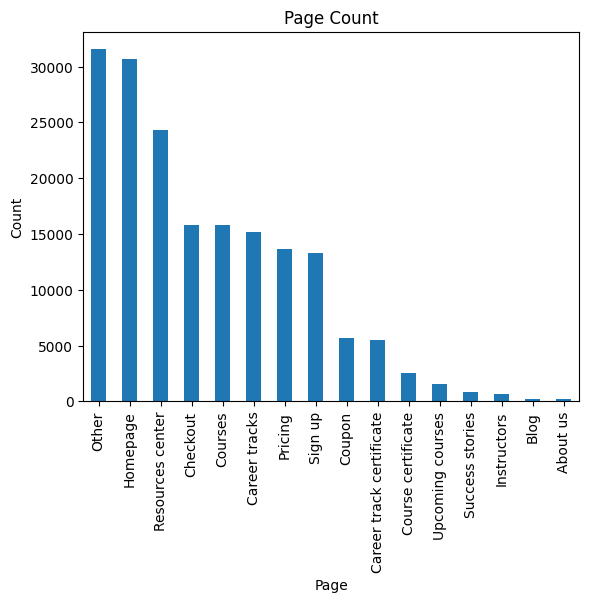

In [23]:
import matplotlib.pyplot as plt

# Visualize Page Count
page_count.plot(kind='bar', title='Page Count')
plt.xlabel('Page')
plt.ylabel('Count')
plt.show()